# Random Forests

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor

## 2. Bootstrapping

**Task 1**  
- We’ve written some code to print the number of rows in the data set and the distribution of safety ratings of the entire dataset. 
- Uncomment the relevant lines (under `## 1.`)
- Are the safety classes distributed equally in the dataset?

<br>

**Task 2**  
- Now that we know the safety variable classes are equally distributed, we’re going to create a bootstrapped sample using `.sample()`.
- `.sample()` takes two arguments:
    - number of rows: which is the same size as the dataset
    - `replace`: set to `True` because bootstrapping is sampling with replacement.
- Uncomment the lines under `## 2.` and then print the distribution of safety ratings of the new sampled dataset.
- What is the safety ratings distribution of the bootstrapped data?

<br>

**Task 3**  
- Note that the distribution has now shifted! 
- Using the same process, write a for loop to create 1000 bootstrapped samples of the same size as the original dataset. 
- Save the percentage of “low” ratings into an array called `low_perc`.

<br>

**Task 4**  
- We’ve written some code to plot a histogram of the low percentage values. 
- Uncomment the lines under `## 4.`
- We see that the average value of the low safety proportion of vehicles spans a range centered around the true mean.

<br>

**Task 5**  
- Now uncomment the lines under `## 5.` to print the average low percentage and the 95% confidence range.

1728
Distribution of safety ratings in 1728 of data:
safety
low     0.333333
med     0.333333
high    0.333333
Name: proportion, dtype: float64
Distribution of safety ratings in bootstrapped sample data:
safety
med     0.350116
low     0.332176
high    0.317708
Name: proportion, dtype: float64
0.33279861111111114


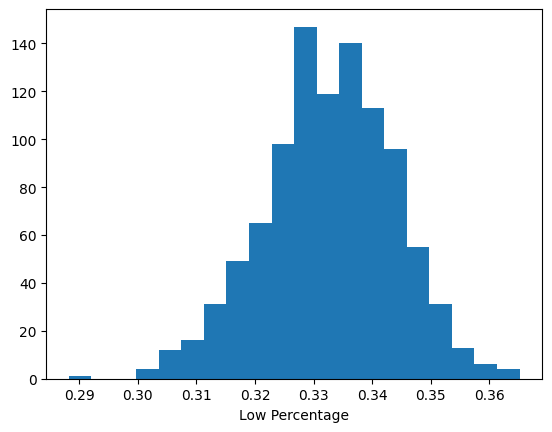

Average low percentage: 0.3328
95% Confidence Interval for low percengage: (0.3096,0.3536)


In [10]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6], drop_first=True)
y = df['accep']

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)
nrows = df.shape[0]

## 1. Print number of rows and distribution of safety ratings
print(nrows)
print(f'Distribution of safety ratings in {nrows} of data:')
print(df.safety.value_counts(normalize=True))

## 2. Create bootstrapped sample
boot_sample = df.sample(nrows, replace=True)
print(f'Distribution of safety ratings in bootstrapped sample data:')
print(boot_sample.safety.value_counts(normalize=True))


## 3. Create 1000 bootstrapped samples
low_perc = []
for i in range(1000):
    boot_sample = df.sample(nrows, replace=True)
    low_perc.append(boot_sample.safety.value_counts(normalize=True)['low'])


## 4. Plot a histogram of the low percentage values
mean_lp = np.mean(low_perc) 
print(mean_lp)
plt.hist(low_perc, bins=20)
plt.xlabel('Low Percentage')
plt.show()

## 5. What are the 2.5 and 97.5 percentiles?
print(f'Average low percentage: {np.mean(low_perc).round(4)}')

low_perc.sort()
print(f'95% Confidence Interval for low percengage: ({low_perc[25].round(4)},{low_perc[975].round(4)})')

## 3. Bagging

**Task 1**  
- Train a decision tree with `max_depth` set to 5. 
- Evaluate the `accuracy_score` on the `test` data.

<br>

**Task 2**  
- We’ve written some code to get a new set of indices, `ids`, to generate a bootstrapped set of row indices. 
- We’ve set the `random_state` argument to `0` for reproducibility. 
- Using these indices, fit another decision tree to training data pertaining to these rows. 
- What is the accuracy score on the test set for the new classifier?

<br>

**Task 3**  
- Repeat a decision tree build on 10 different bootstrapped samples using a for loop. 
- Save the results, `y_pred` of all 10 predictions on the test set in an array, `preds`. 
- Take the average of the 10 results and save it as `ba_pred`

<br>

**Task 4**  
- We have just performed bagging! Calculate the accuracy score on the bagged predictions and save it as `ba_accuracy`. 
- (Note that the predictions are averaged and will no longer be binary as a bunch of zeroes and ones have been averaged.)

In [19]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6], drop_first=True)
y = df['accep']
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)

#1.Decision tree trained on  training set
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train, y_train)

print(f'Accuracy score of DT on test set (trained using full set): {np.round(dt.score(x_test, y_test), 4)}')

#2. New decision tree trained on bootstrapped sample
dt2 = DecisionTreeClassifier(max_depth=5)
#ids are the indices of the bootstrapped sample
ids = x_train.sample(x_train.shape[0], replace=True, random_state=0).index
dt2.fit(x_train.loc[ids], y_train.loc[ids])
print(f'Accuracy score of DT on test set (trained using bootstrapped sample): {np.round(dt2.score(x_test, y_test), 4)}')

## 3. Bootstapping ten samples and aggregating the results:
preds = []
random_state = 0
#Write for loop:
for i in range(10):
    ids = x_train.sample(x_train.shape[0], replace=True, random_state=random_state+i).index
    dt = DecisionTreeClassifier(max_depth=5)
    dt.fit(x_train.loc[ids], y_train.loc[ids])
    y_pred = dt.predict(x_test)
    preds.append(y_pred)

ba_pred = np.array(preds).mean(0)

# 4. Calculate accuracy of the bagged sample
ba_accuracy = accuracy_score(ba_pred>=0.5, y_test)
print(f'Accuracy score of aggregated 10 bootstrapped samples:{np.round(ba_accuracy, 4)}')

Accuracy score of DT on test set (trained using full set): 0.8588
Accuracy score of DT on test set (trained using bootstrapped sample): 0.8912
Accuracy score of aggregated 10 bootstrapped samples:0.9097


## 4. Random Feature Selection

**Task 1**  
- We’ve written some code that create a random sample of 10 features, `rand_features` from the 15 original features by using NumPy’s `random.choice` method and defined a decision tree classifier `dt2`.
- Train the new decision tree model (without specifying any pre-selected parameters!), `dt2` on training data that *contains only these ten columns*. 
- Calculate the new accuracy on the test set, store it as `accuracy_dt2` and print it to compare it to the tree built using the entire training set.

<br>

**Task 2**  
- Every time we use `np.random.choice`, we can generate a new subset of random features. 
- We’re now going to obtain predictions from ten decision tree classifiers by doing the following. 
- We’ve initialized an empty array called `predictions` and created a `for` loop with ten iterations with the following steps:
    - The first line selects ten random features using `rand_features = np.random.choice(x_train.columns, 10)`
    - Fit the decision tree `dt2` to training data pertaining to these features.
    - Append the predictions on test data (with only `rand_features` columns!) to the array `predictions`
- Uncomment the relevant lines.

<br>

**Task 3**  
- We have ten decision trees’ worth of predictions now! 
- To meaningfully combine their predictions, let’s use the following system. 
- If more than 5 classifiers predict that a datapoint belong to a certain class, we assign an aggregate prediction to that class. 
- To do this:
    - Create an array `prob_predictions` that is the mean value of the predictions stored in `predictions`. This is similar to a probability on each datapoint since this is a binary classification problem.
    - Create an array agg_predictions that assigns a value of False or True to each element in `prob_predictions` based on whether the value is <= 0.5 or >0.5. This gives us the *aggregate* prediction from the 10 decision tree classifiers.
    - Calculate the accuaracy score on this aggregate prediction array. Store it as `agg_accuracy` and print it to compare it to the previous accuracy scores.

In [28]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6], drop_first=True)
y = df['accep']
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print("Accuracy score of DT on test set (trained using full feature set):")
accuracy_dt = dt.score(x_test, y_test)
print(accuracy_dt)

# 1. Create rand_features, random samples from the set of features
rand_features = np.random.choice(x_train.columns, 10)

# Make new decision tree trained on random sample of 10 features and calculate the new accuracy score
dt2 = DecisionTreeClassifier()
dt2.fit(x_train[rand_features], y_train)
accuracy_dt2 = dt2.score(x_test[rand_features], y_test)

print("Accuracy score of DT on test set (trained using random feature sample):")
print(accuracy_dt2)

# 2. Build decision trees on 10 different random samples 
predictions = []
for i in range(10):
    rand_features = np.random.choice(x_train.columns,10)
    dt2.fit(x_train[rand_features], y_train)
    predictions.append(dt2.predict(x_test[rand_features]))

## 3. Get aggregate predictions and accuracy score
prob_predictions = np.array(predictions).mean(0)
agg_predictions = (prob_predictions > 0.5)
agg_accuracy = accuracy_score(agg_predictions, y_test)
print('Accuracy score of aggregated 10 samples:')
print(agg_accuracy)

Accuracy score of DT on test set (trained using full feature set):
0.9467592592592593
Accuracy score of DT on test set (trained using random feature sample):
0.6782407407407407
Accuracy score of aggregated 10 samples:
0.7731481481481481


## 5. Bagging in `scikit-learn`

**Task 1**  
- Create an instance of `BaggingClassifier`, `bag_dt` with the following arguments:
    - `DecisionTreeClassifier` (with `max_depth=5)` base estimator
    - `n_estimators=10`.
- Fit the model on the training set and evaluate the model on the test set by calculating the accuracy score. 
- Save the score as `bag_accuracy` and print it.

<br>

**Task 2**  
- Create a different bagging classifier, `bag_dt_10` that includes the parameter `max_features=10` over and above the parameters in `bag_dt`. 
- Fit the model on the training set and evaluate the model on the test set by calculating the accuracy score. 
- Save the score as `bag_accuracy_10` and print it.

<br>

**Task 3**  
- Change the base estimator of the bagged classifier to be logistic regression and call this instance `bag_lr` as follows:
    - Set base_estimator to be `LogisticRegression`()
    - Set `n_estimators` and `max_features` to be 10 like in the previous checkpoint
- Refit on the training set and calculate the accuracy on the test set. 
- Store this as `bag_accuracy_lr` and print it.

In [7]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6], drop_first=True)
y = df['accep']
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)

# 1. Bagging classifier with 10 Decision Tree base estimators
bag_dt = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=10)
bag_dt.fit(x_train, y_train)
bag_accuracy = bag_dt.score(x_test, y_test)

print('Accuracy score of Bagged Classifier, 10 estimators:')
print(bag_accuracy)

# 2.Set `max_features` to 10.
bag_dt_10 = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=10, max_features=10)
bag_dt_10.fit(x_train, y_train)
bag_accuracy_10 = bag_dt_10.score(x_test, y_test)
print('Accuracy score of Bagged Classifier, 10 estimators, 10 max features:')
print(bag_accuracy_10)


# 3. Change base estimator to Logistic Regression
from sklearn.linear_model import LogisticRegression

bag_lr = BaggingClassifier(estimator=LogisticRegression(), n_estimators=10, max_features=10)
bag_lr.fit(x_train, y_train)
bag_accuracy_lr = bag_lr.score(x_test, y_test)

print('Accuracy score of Logistic Regression, 10 estimators, 10 max features:')
print(bag_accuracy_lr)

Accuracy score of Bagged Classifier, 10 estimators:
0.9143518518518519
Accuracy score of Bagged Classifier, 10 estimators, 10 max features:
0.8125
Accuracy score of Logistic Regression, 10 estimators, 10 max features:
0.9050925925925926


## 6. Train and Predict using `scikit-learn`

**Task 1**  
- Create a random forest classification model defined as `rf` with default parameters. 
- Use the `.get_params()` method to get the parameters of the random forest. 
- Store it as `rf_params` and print it.

<br>

**Task 2**  
- Fit `rf` using the training data set and labels. 
- Predict the classes of the test data set (`x_test`) and save this as an array `y_pred`. 
- Calculate the accuracy of model on the test set (either using `.score()` or `accuracy_score()`) and save it as `rf_accuracy`.

<br>

**Task 3**  
- Implement additional classification evaluation metrics — calculate and print the precision, recall, and confusion matrix on the test set. 
- Store them as `rf_precision`, `rf_recall` and `rf_confusion_matrix` respectively.

In [13]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6], drop_first=True)
y = df['accep']
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)

# 1. Create a Random Forest Classifier and print its parameters
rf = RandomForestClassifier()
rf_params = rf.get_params()
print('Random Forest parameters:')
print(rf_params)

# 2. Fit the Random Forest Classifier to training data and calculate accuracy score on the test data
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Test set accuracy:')
rf_accuracy = rf.score(x_test, y_test)
print(rf_accuracy)

# 3. Calculate Precision and Recall scores and the Confusion Matrix
rf_precision = precision_score(y_test, y_pred)
print(f'Test set precision: {rf_precision}')
rf_recall = recall_score(y_test, y_pred)
print(f'Test set recall: {rf_recall}')
rf_confusion_matrix = confusion_matrix(y_test, y_pred)
print(f'Test set confusion matrix:\n{rf_confusion_matrix}')

Random Forest parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Test set accuracy:
0.9513888888888888
Test set precision: 0.9457364341085271
Test set recall: 0.8970588235294118
Test set confusion matrix:
[[289   7]
 [ 14 122]]


## 7.

**Task 1**  
- Initialize and fit a `RandomForestRegressor()` model named `rfr` on the training data. 
- Calculate the default scores (the R^2 values here) on the train and test sets, store them as `r_squared_train` and `r_squared_test` respectively, and print them.

<br>

**Task 2**  
- Calculate the average price of a car, store it as `avg_price`. 
- Calculate the MAE (Mean Absolute Error) for the train and test sets and store the values as `mae_train` and `mae_test`. 
- Print all three values to to see how the errors compare to the mean.

In [18]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6], drop_first=True)

## Generating some fake prices for regression! :) 
fake_prices = (15000 + 25*df.index.values)+np.random.normal(size=df.shape[0])*5000
df['price'] = fake_prices
print(df.price.describe())
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)

# 1. Create a Random Regressor and print `R^2` scores on training and test data
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
r_squared_train = rfr.score(x_train, y_train)
r_squared_test = rfr.score(x_test, y_test)

print(f'Train set R^2: {r_squared_train}')
print(f'Test set R^2: {r_squared_test}')

# 2. Print Mean Absolute Error on training and test data
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
avg_price = y.mean()

print(f'Avg Price Train/Test: {avg_price}')
print(f'Train set MAE: {mae_train}')
print(f'Test set MAE: {mae_test}')

count     1728.000000
mean     36476.712880
std      13457.464931
min       4786.538756
25%      25779.729816
50%      36383.240521
75%      47528.160340
max      67246.782150
Name: price, dtype: float64
Train set R^2: 0.9772821150013223
Test set R^2: 0.8339109800951005
Avg Price Train/Test: 36476.7128804898
Train set MAE: 1595.3337323474311
Test set MAE: 4480.9920316610405


## 8.